In [826]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [828]:
train_data = pd.read_csv('data/train.csv')

In [830]:
train_data.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Data Preprocessing for Train Data

In [833]:
#check for missing data
train_data.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


<Axes: >

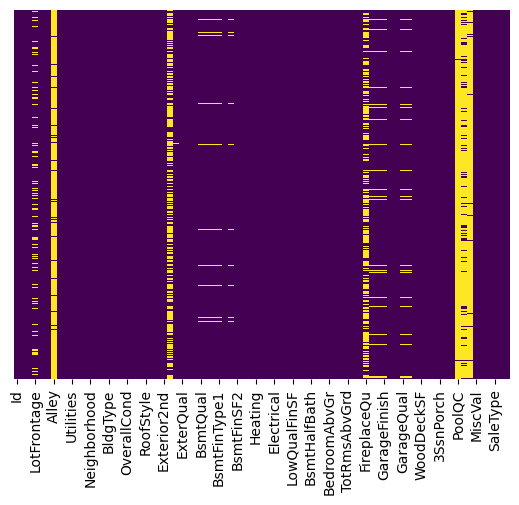

In [835]:
#check for null using heatmap to know which data to focus on
sns.heatmap(train_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [836]:
#drop columns with too many missing values to do anything useful with
train_data.drop(['Alley', 'LotFrontage', 'Exterior2nd', 'FireplaceQu', 'PoolQC',
'Exterior1st', 'MiscFeature', 'MasVnrType', 'PoolArea', 'MiscVal',
'MoSold', 'SaleType', 'Fence'],axis=1,inplace=True)

In [837]:
train_data.head(15)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,0,0,2008,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,0,0,2007,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,0,0,2008,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,272,0,0,2006,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,0,0,2008,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,40,30,0,320,0,2009,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,255,57,0,0,0,2007,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,235,204,228,0,0,2009,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,90,0,205,0,0,2008,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,4,0,0,0,2008,Normal,118000


<Axes: >

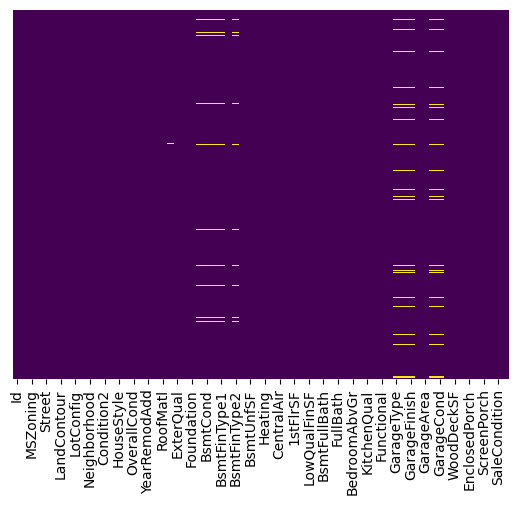

In [841]:
sns.heatmap(train_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [842]:
train_data.isnull()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [845]:
train_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,0,0,2008,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,0,0,2007,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,0,0,2008,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,272,0,0,2006,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,0,0,2008,Normal,250000


In [847]:
missing = train_data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrArea       8
Electrical       1
dtype: int64


In [849]:
#calculate the mean of each numeric column and fill in the missing values with the corresponding column's mean.
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if train_data[col].isnull().sum() > 0:
        train_data[col] = train_data[col].fillna(train_data[col].median())

In [851]:
cat_cols = train_data.select_dtypes(include='object').columns
for col in cat_cols:
    if train_data[col].isnull().sum() > 0:
        if train_data[col].isnull().sum() / len(train_data) < 0.05:
            train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
        else:
            train_data[col] = train_data[col].fillna('None')

In [853]:
#checking for null
print(train_data.isnull().sum().sum())

0


<Axes: >

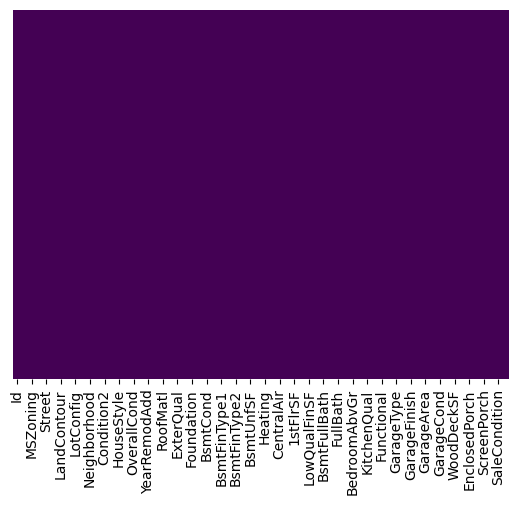

In [855]:
sns.heatmap(train_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [856]:
# Feature Engineering
#Total Square Footage
train_data['TotalSqFt'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
train_data['TotalSqFt']

0       2566
1       2524
2       2706
3       2473
4       3343
        ... 
1455    2600
1456    3615
1457    3492
1458    2156
1459    2512
Name: TotalSqFt, Length: 1460, dtype: int64

In [859]:
#TotalBathrooms = FullBath + 0.5 * HalfBath + BsmtFullBath + 0.5 * BsmtHalfBath
train_data['TotalBathrooms'] = (train_data['FullBath'] + 0.5*train_data['HalfBath'] + train_data['BsmtFullBath'] + 0.5*train_data['BsmtHalfBath'])
train_data['TotalBathrooms']

0       3.5
1       2.5
2       3.5
3       2.0
4       3.5
       ... 
1455    2.5
1456    3.0
1457    2.0
1458    2.0
1459    2.5
Name: TotalBathrooms, Length: 1460, dtype: float64

In [861]:
#House Age Features
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['RemodelAge'] = train_data['YrSold'] - train_data['YearRemodAdd']
train_data['GarageAge'] = train_data['YrSold'] - train_data['GarageYrBlt']

#just incase some columns have No garage year built options (NaNs or negative)
train_data['GarageAge'] = train_data['GarageAge'].fillna(0).clip(lower=0)

train_data[['HouseAge','RemodelAge', 'GarageAge']]

,HouseAge,RemodelAge,GarageAge
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0
...,...,...,...
1455,8,7,8.0
1456,32,22,32.0
1457,69,4,69.0
1458,60,14,60.0


In [863]:
# Quality x Size Interactions
train_data['OverallQualSF'] = train_data['GrLivArea'] * train_data['OverallQual']
train_data['OverallCondSF'] = train_data['GrLivArea'] * train_data['OverallCond']

train_data[['OverallQualSF', 'OverallCondSF']]

,OverallQualSF,OverallCondSF
0,11970,8550
1,7572,10096
2,12502,8930
3,12019,8585
4,17584,10990
...,...,...
1455,9882,8235
1456,12438,12438
1457,16380,21060
1458,5390,6468


In [865]:
# Total Porch Area
train_data['TotalPorchSF'] = (train_data['OpenPorchSF'] + train_data['EnclosedPorch'] + train_data['3SsnPorch'] + train_data['ScreenPorch'])
train_data['TotalPorchSF']

0        61
1         0
2        42
3       307
4        84
       ... 
1455     40
1456      0
1457     60
1458    112
1459     68
Name: TotalPorchSF, Length: 1460, dtype: int64

In [867]:
# Room per Area
train_data['RoomsPerArea'] = train_data['TotRmsAbvGrd'] / train_data['GrLivArea']
train_data['RoomsPerArea']

0       0.004678
1       0.004754
2       0.003359
3       0.004077
4       0.004095
          ...   
1455    0.004250
1456    0.003377
1457    0.003846
1458    0.004638
1459    0.004777
Name: RoomsPerArea, Length: 1460, dtype: float64

In [869]:
#checking if the house has been remodeled
train_data['IsRemodeled'] = (train_data['YearBuilt'] != train_data['YearRemodAdd']).astype(int)
train_data['IsRemodeled']

0       0
1       0
2       1
3       1
4       0
       ..
1455    1
1456    1
1457    1
1458    1
1459    0
Name: IsRemodeled, Length: 1460, dtype: int32

In [871]:
#Encode Categorical columns with LabelEncoder
##train data
from sklearn.preprocessing import LabelEncoder

# Identify object (categorical) columns
cat_cols = train_data.select_dtypes(include='object').columns

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in cat_cols:
    train_data[col] = le.fit_transform(train_data[col].astype(str))

In [873]:
train_data.corr(numeric_only=True)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,TotalSqFt,TotalBathrooms,HouseAge,RemodelAge,GarageAge,OverallQualSF,OverallCondSF,TotalPorchSF,RoomsPerArea,IsRemodeled
Id,1.000000,0.011156,-0.006096,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,...,-0.000322,0.004540,0.012724,0.022049,0.000161,-0.008200,0.017315,-0.010914,0.022218,-0.003342
MSSubClass,0.011156,1.000000,0.035900,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,...,-0.082225,0.151048,-0.028746,-0.041968,-0.082451,0.039390,0.050867,-0.036848,-0.131151,-0.058553
MSZoning,-0.006096,0.035900,1.000000,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,...,-0.100407,-0.193097,0.307520,0.173441,0.262217,-0.114045,0.016968,-0.020109,0.110254,0.114991
LotArea,-0.033226,-0.139781,-0.034452,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,...,0.307234,0.204764,-0.014832,-0.014709,0.025036,0.231912,0.229959,0.071310,-0.172952,0.004274
Street,0.008916,-0.024969,0.087654,-0.197131,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,...,0.030464,0.010414,-0.022203,-0.067091,-0.025685,0.050333,0.052556,-0.005650,-0.037577,0.039877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OverallQualSF,-0.008200,0.039390,-0.114045,0.231912,0.050333,-0.196091,-0.043102,-0.008129,-0.076673,0.002279,...,0.886138,0.614010,-0.366373,-0.413511,-0.365285,1.000000,0.770888,0.253259,-0.616989,0.028638
OverallCondSF,0.017315,0.050867,0.016968,0.229959,0.052556,-0.148494,-0.096356,-0.002645,-0.086336,0.066689,...,0.690802,0.428585,0.037529,-0.268135,-0.027022,0.770888,1.000000,0.280517,-0.521641,0.223771
TotalPorchSF,-0.010914,-0.036848,-0.020109,0.071310,-0.005650,-0.040338,-0.012443,0.065707,-0.086284,0.004818,...,0.253942,0.124093,0.122563,-0.023963,0.060430,0.253259,0.280517,1.000000,-0.228759,0.108268
RoomsPerArea,0.022218,-0.131151,0.110254,-0.172952,-0.037577,0.141166,0.015329,0.022292,0.061508,-0.116051,...,-0.606100,-0.471295,0.285711,0.292851,0.239888,-0.616989,-0.521641,-0.228759,1.000000,-0.010996


<Axes: >

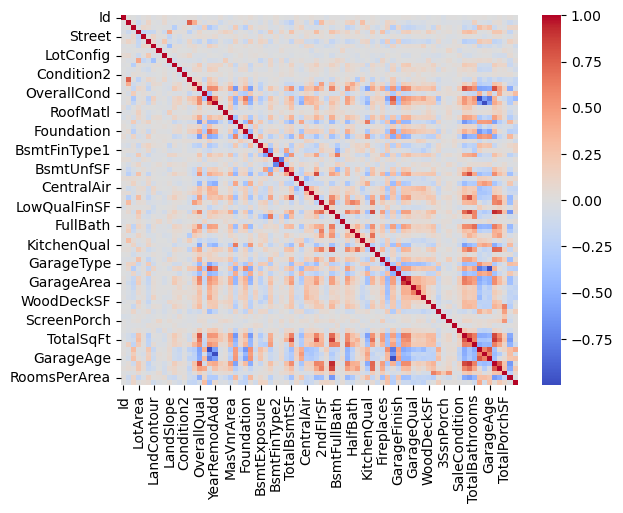

In [875]:
sns.heatmap(train_data.corr(numeric_only=True),cmap='coolwarm')

## Test Cleaning

In [878]:
test_data = pd.read_csv('data/test.csv')

In [880]:
test_data.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [882]:
test_data.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1455,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


<Axes: >

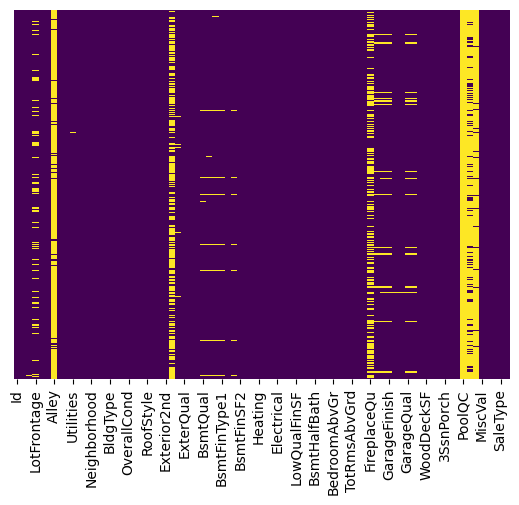

In [884]:
#check for null using heatmap to know which data to focus on
sns.heatmap(test_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [885]:
#drop columns with too many missing values to do anything useful with
test_data.drop(['Alley', 'LotFrontage', 'Exterior2nd', 'FireplaceQu', 'PoolQC',
'Exterior1st', 'MiscFeature', 'MasVnrType', 'PoolArea', 'MiscVal',
'MoSold', 'SaleType','Fence'],axis=1,inplace=True)

<Axes: >

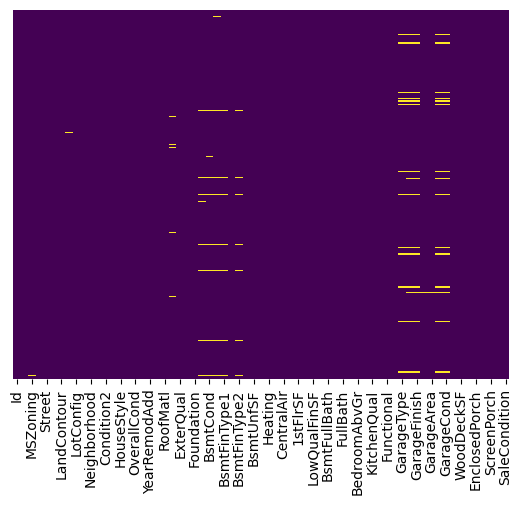

In [886]:
#check for null using heatmap to know which data to focus on
sns.heatmap(test_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [887]:
#calculate the mean of each numeric column and fill in the missing values with the corresponding column's mean.
numeric_cols = test_data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if test_data[col].isnull().sum() > 0:
        test_data[col] = test_data[col].fillna(test_data[col].median())

In [890]:
cat_cols = test_data.select_dtypes(include='object').columns
for col in cat_cols:
    if test_data[col].isnull().sum() > 0:
        if test_data[col].isnull().sum() / len(test_data) < 0.05:
            test_data[col] = test_data[col].fillna(test_data[col].mode()[0])
        else:
            test_data[col] = test_data[col].fillna('None')

<Axes: >

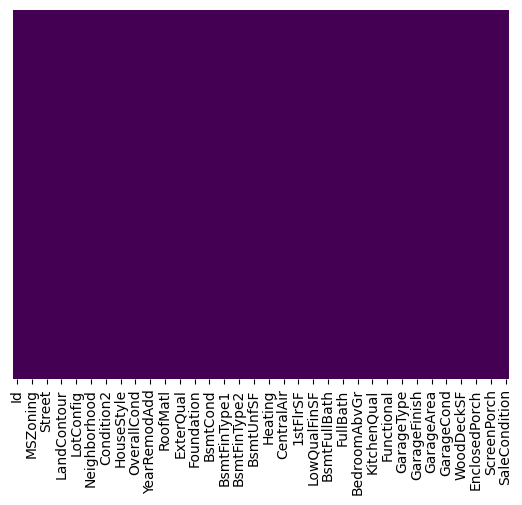

In [891]:
#check for null using heatmap to know which data to focus on
sns.heatmap(test_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [892]:
# Feature Engineering
#Total Square Footage
test_data['TotalSqFt'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']
test_data['TotalSqFt']

0       1778.0
1       2658.0
2       2557.0
3       2530.0
4       2560.0
         ...  
1454    1638.0
1455    1638.0
1456    2448.0
1457    1882.0
1458    2996.0
Name: TotalSqFt, Length: 1459, dtype: float64

In [893]:
#TotalBathrooms = FullBath + 0.5 * HalfBath + BsmtFullBath + 0.5 * BsmtHalfBath
test_data['TotalBathrooms'] = (test_data['FullBath'] + 0.5*test_data['HalfBath'] + test_data['BsmtFullBath'] + 0.5*test_data['BsmtHalfBath'])
test_data['TotalBathrooms']

0       1.0
1       1.5
2       2.5
3       2.5
4       2.0
       ... 
1454    1.5
1455    1.5
1456    2.0
1457    1.5
1458    2.5
Name: TotalBathrooms, Length: 1459, dtype: float64

In [894]:
#House Age Features
test_data['HouseAge'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['RemodelAge'] = test_data['YrSold'] - test_data['YearRemodAdd']
test_data['GarageAge'] = test_data['YrSold'] - test_data['GarageYrBlt']

#just incase some columns have No garage year built options (NaNs or negative)
test_data['GarageAge'] = test_data['GarageAge'].fillna(0).clip(lower=0)

test_data[['HouseAge','RemodelAge', 'GarageAge']]

,HouseAge,RemodelAge,GarageAge
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0
...,...,...,...
1454,36,36,27.0
1455,36,36,36.0
1456,46,10,46.0
1457,14,14,27.0


In [897]:
# Quality x Size Interactions
test_data['OverallQualSF'] = test_data['GrLivArea'] * test_data['OverallQual']
test_data['OverallCondSF'] = test_data['GrLivArea'] * test_data['OverallCond']

test_data[['OverallQualSF', 'OverallCondSF']]

,OverallQualSF,OverallCondSF
0,4480,5376
1,7974,7974
2,8145,8145
3,9624,9624
4,10240,6400
...,...,...
1454,4368,7644
1455,4368,5460
1456,6120,8568
1457,4850,4850


In [899]:
# Total Porch Area
test_data['TotalPorchSF'] = (test_data['OpenPorchSF'] + test_data['EnclosedPorch'] +test_data['3SsnPorch'] + test_data['ScreenPorch'])
test_data['TotalPorchSF']

0       120
1        36
2        34
3        36
4       226
       ... 
1454      0
1455     24
1456      0
1457     32
1458     48
Name: TotalPorchSF, Length: 1459, dtype: int64

In [900]:
# Room per Area
test_data['RoomsPerArea'] = test_data['TotRmsAbvGrd'] / test_data['GrLivArea']
test_data['RoomsPerArea']

0       0.005580
1       0.004515
2       0.003683
3       0.004364
4       0.003906
          ...   
1454    0.004579
1455    0.005495
1456    0.005719
1457    0.006186
1458    0.004500
Name: RoomsPerArea, Length: 1459, dtype: float64

In [901]:
#checking if the house has been remodeled
test_data['IsRemodeled'] = (test_data['YearBuilt'] != test_data['YearRemodAdd']).astype(int)
test_data['IsRemodeled']

0       0
1       0
2       1
3       0
4       0
       ..
1454    0
1455    0
1456    1
1457    0
1458    1
Name: IsRemodeled, Length: 1459, dtype: int32

In [902]:
# Encode Categorical Columns
##test data
# Identify object (categorical) columns
cat_cols = test_data.select_dtypes(include='object').columns

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in cat_cols:
    test_data[col] = le.fit_transform(test_data[col].astype(str))

## Features and Targets

In [908]:
X_train = train_data.drop(['SalePrice', 'Id'], axis=1)
y_train = train_data['SalePrice']
x_test = test_data.drop(['Id'], axis=1)

y_train_log = np.log1p(y_train)

## Random Forest Regressor

In [915]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor( n_estimators=300, max_depth=6, min_samples_leaf=5, max_features='sqrt', random_state=42, n_jobs=-1)

#fit model on log-transformed model
rf.fit(X_train, y_train_log)

#evaluate on training data
rf_pred_on_train = rf.predict(X_train)
mse = mean_squared_error(y_train_log, rf_pred_on_train)
rmse = np.sqrt(mse)
print("Random Forest Train RMSE :", rmse)

Random Forest Train RMSE : 0.12373028891658402


In [916]:
from sklearn.model_selection import cross_val_score


# Use negative RMSE because sklearn expects higher = better
scores = cross_val_score(
    rf, 
    X_train, 
    y_train_log, 
    scoring='neg_root_mean_squared_error', 
    cv=5
)

# Flip sign and print average
print("Randowm Forest Cross Validation RMSE (log scale):", -np.mean(scores))

Randowm Forest Cross Validation RMSE (log scale): 0.14863417789824143


In [918]:
#PREDICTING ON TEST DATA
rf_test_pred_log = rf.predict(x_test)
rf_preds_test = np.expm1(rf_test_pred_log)

In [919]:
rf_submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': rf_preds_test
})
rf_submission.to_csv('submission_rf.csv', index=False)


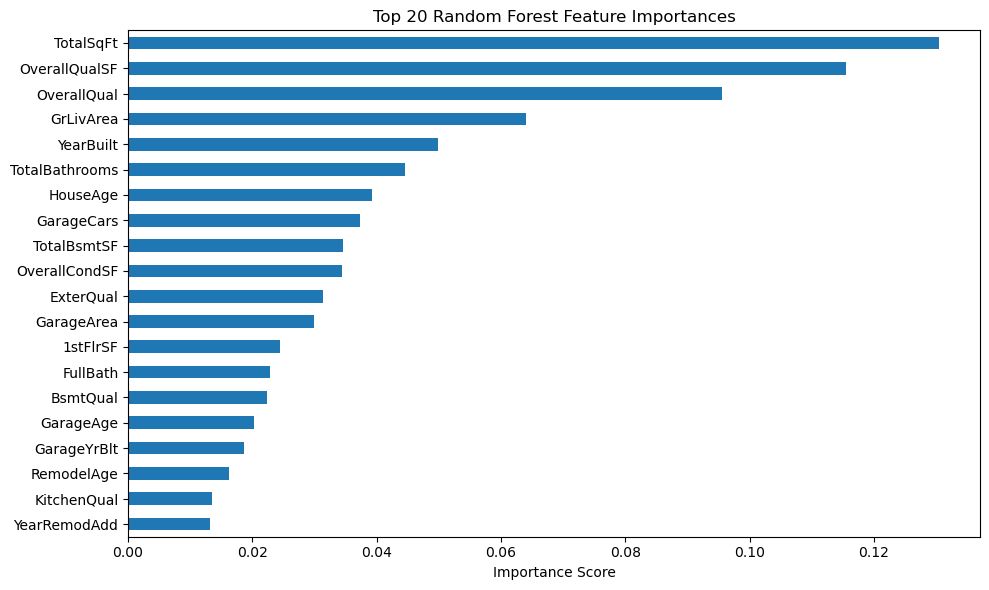

In [920]:
#visualizing feature importance for random forest
rf_importance = rf.feature_importances_
rf_features = pd.Series(rf_importance, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
rf_features.head(20).plot(kind='barh')
plt.title('Top 20 Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()

## XGBoost

In [924]:
X_train = train_data.drop(['SalePrice', 'Id'], axis=1)
y_train = train_data['SalePrice']
x_test = test_data.drop(['Id'], axis=1)

y_train_log = np.log1p(y_train)

In [925]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor(max_depth=3, 
    n_estimators=100,
    learning_rate=0.1,
    random_state=42)

xgb.fit(X_train, y_train_log)

xgb_pred_on_train = xgb.predict(X_train)
mse = mean_squared_error(y_train_log, xgb_pred_on_train)
rmse = np.sqrt(mse)
print("XGBoost Regressor Train RMSE :", rmse)

XGBoost Regressor Train RMSE : 0.08104718738758943


In [926]:
from sklearn.model_selection import cross_val_score


# Use negative RMSE because sklearn expects higher = better
scores = cross_val_score(
    xgb, 
    X_train, 
    y_train_log, 
    scoring='neg_root_mean_squared_error', 
    cv=5
)

# Flip sign and print average
print("XGBoost CV RMSE (log scale):", -np.mean(scores))

XGBoost CV RMSE (log scale): 0.1259848893126024


In [927]:
#PREDICTING ON TEST DATA
xgb_test_pred_log = rf.predict(x_test)
xgb_preds_test = np.expm1(xgb_test_pred_log)

In [929]:
xgb_submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': rf_preds_test
})
xgb_submission.to_csv('submission_xgb.csv', index=False)

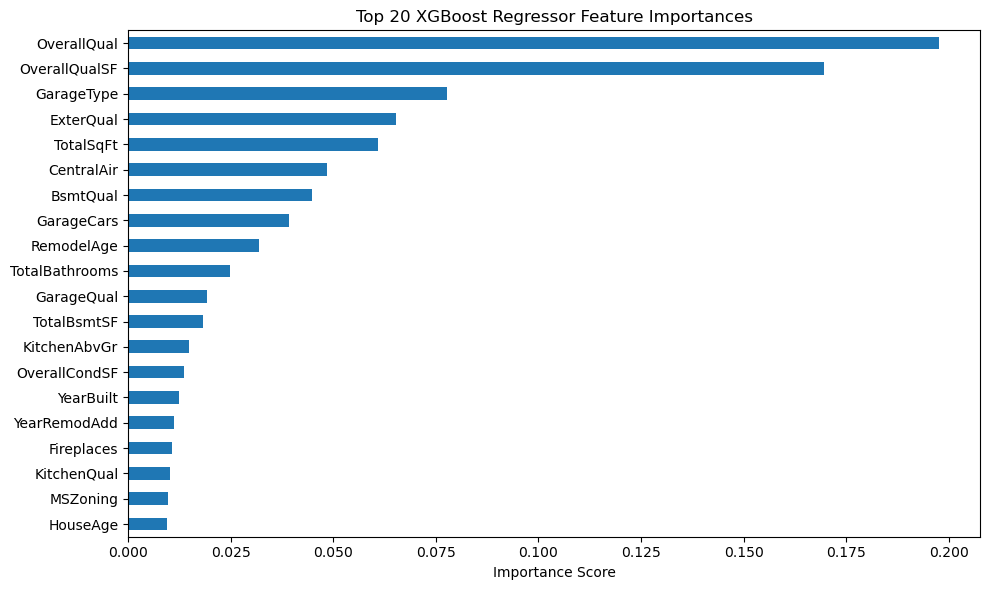

In [930]:
#visualizing feature importance for xgboost
xgb_importance = xgb.feature_importances_
xgb_features = pd.Series(xgb_importance, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
xgb_features.head(20).plot(kind='barh')
plt.title('Top 20 XGBoost Regressor Feature Importances')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()